# CPU and Memory Usage Analysis Delegation task

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Specify the directory containing the CSV files
file_path = '../data/tests/resource_usage_delegation_1735056588645.csv'

# Now, you can work with the list of DataFrames
# For example, to concatenate all DataFrames into one:
df = pd.read_csv(file_path)
df['capture_number'] = range(1, len(df) + 1)

In [2]:
df.head()

,image_size,processing_time,cpu_usage,memory_usage,image_path,preprocess_time,inference_time,postprocess_time,original_shape,objects_detected,detection_place,capture_number
0,432297,3.268928,0.329875,0.1385,./data/local/photo_1731864866788_result.jpg,14.686584,546.893597,5.796909,"(480, 640)","[('person', 0.3604039251804352)]",local,1
1,429155,0.593103,0.480000,0.1670,./data/local/photo_1731863710016_result.jpg,11.833191,462.940216,4.020929,"(480, 640)","[('person', 0.3846302032470703)]",local,2
2,451529,0.588700,0.461500,0.1670,./data/local/photo_1731863345375_result.jpg,9.578466,455.241680,3.874063,"(480, 640)","[('car', 0.9355131387710571), ('car', 0.813888...",local,3
3,424420,0.583750,0.465500,0.1670,./data/local/photo_1731862528053_result.jpg,9.466410,450.619936,3.885984,"(480, 640)","[('car', 0.8444777131080627), ('car', 0.646037...",local,4
4,435429,0.579972,0.506000,0.1680,./data/local/photo_1731863549494_result.jpg,9.460926,448.868036,3.956556,"(480, 640)","[('person', 0.9255820512771606)]",local,5


## 1. Line Plot: CPU and Memory Usage Over Processing Time

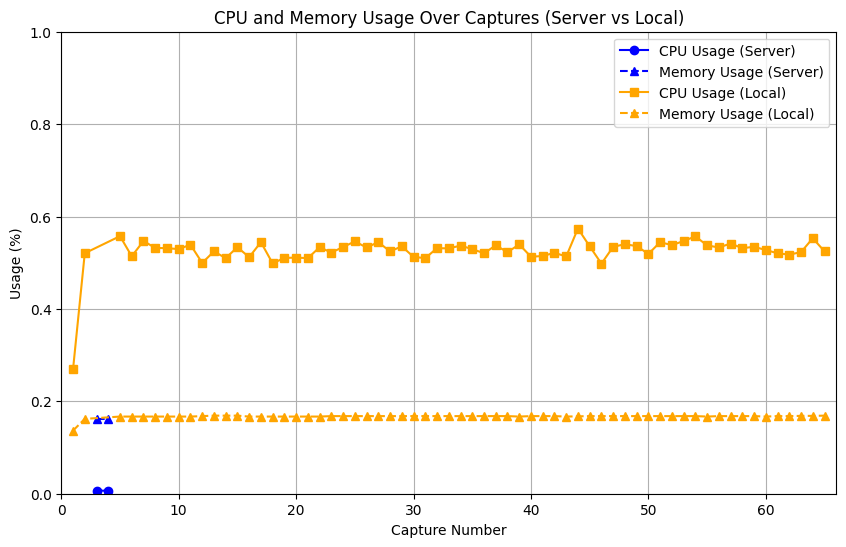

In [9]:
plt.figure(figsize=(10, 6))

# Filter data based on detection_place
server_data = df[df['detection_place'] == 'server']
local_data = df[df['detection_place'] == 'local']

# Plot CPU and Memory Usage for 'server'
plt.plot(server_data['capture_number'], server_data['cpu_usage'], label='CPU Usage (Server)', marker='o', linestyle='-', color='blue')
plt.plot(server_data['capture_number'], server_data['memory_usage'], label='Memory Usage (Server)', marker='^', linestyle='--', color='blue')

# Plot CPU and Memory Usage for 'local'
plt.plot(local_data['capture_number'], local_data['cpu_usage'], label='CPU Usage (Local)', marker='s', linestyle='-', color='orange')
plt.plot(local_data['capture_number'], local_data['memory_usage'], label='Memory Usage (Local)', marker='^', linestyle='--', color='orange')

# Add labels, title, and legend
plt.xlabel('Capture Number')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage Over Captures (Server vs Local)')
plt.xlim(0, df['capture_number'].max() + 1)  # Add some padding on x-axis
plt.ylim(0, 1)  # Assuming usage percentage is normalized between 0 and 1
plt.legend()
plt.grid(True)
plt.show()

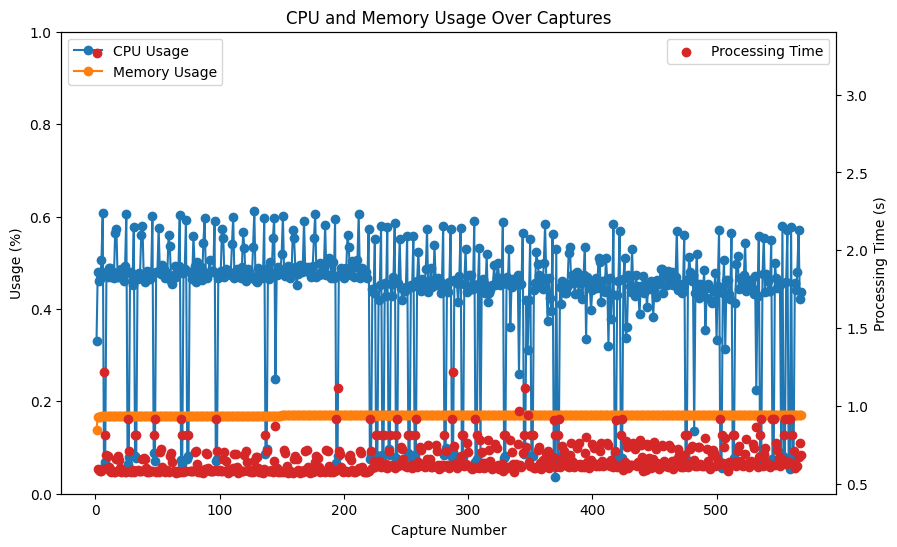

In [3]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')
# Set the y-axis limit for CPU usage
ax1.set_ylim(0, 1)


ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['processing_time'], color='tab:red', label='Processing Time')
ax2.set_ylabel('Processing Time (s)')
ax2.legend(loc='upper right')

plt.show()

# image_size

KeyError: 'num_objects_detected'

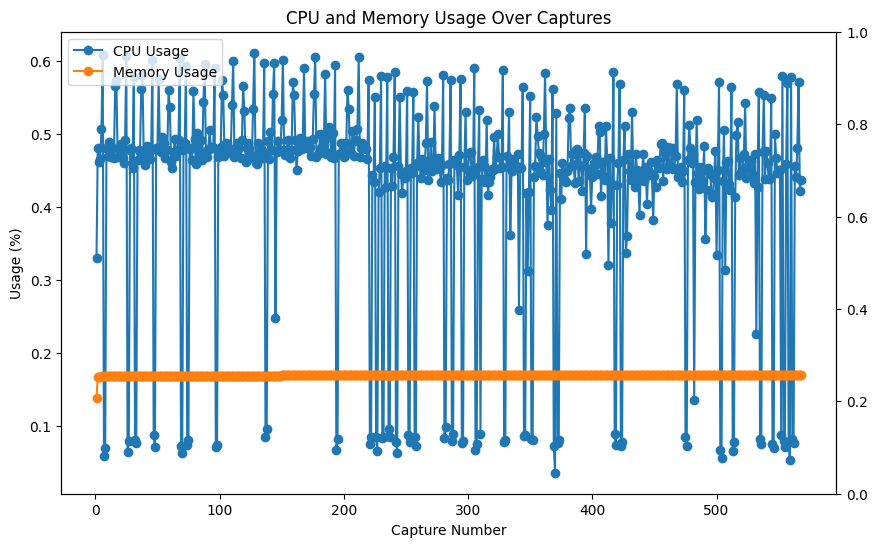

In [4]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df['capture_number'], df['cpu_usage'], label='CPU Usage', marker='o', color='tab:blue')
ax1.plot(df['capture_number'], df['memory_usage'], label='Memory Usage', marker='o', color='tab:orange')
ax1.set_xlabel('Capture Number')
ax1.set_ylabel('Usage (%)')
ax1.set_title('CPU and Memory Usage Over Captures')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.scatter(df['capture_number'], df['num_objects_detected'], color='tab:red', label='Number of Objects Detected')
ax2.set_ylabel('Number of Objects Detected')
ax2.legend(loc='upper right')

plt.show()

## 2. Scatter Plot: CPU and Memory Usage

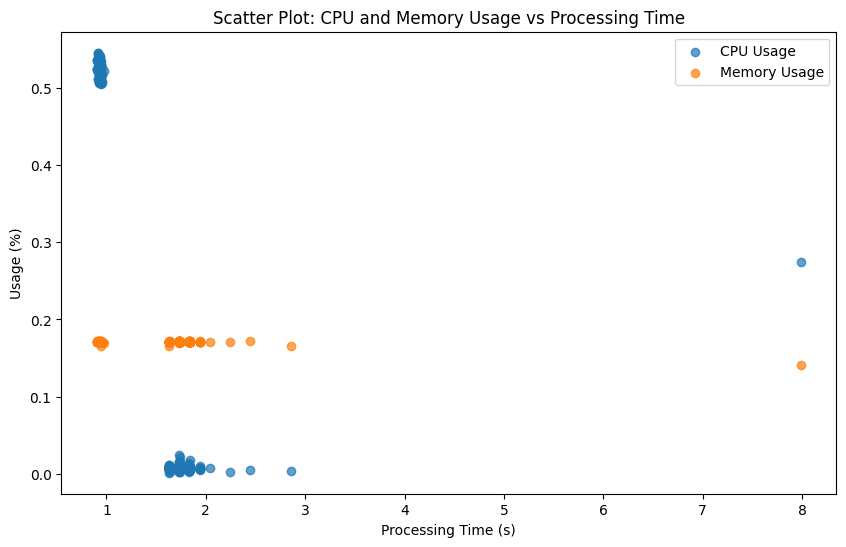

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['processing_time'], df['cpu_usage'], label='CPU Usage', alpha=0.7)

plt.scatter(df['processing_time'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.ylabel('Usage (%)')
plt.xlabel('Processing Time (s)')
plt.title('Scatter Plot: CPU and Memory Usage vs Processing Time')
plt.legend()
plt.show()

## 3. Histogram: Distribution of CPU and Memory Usage

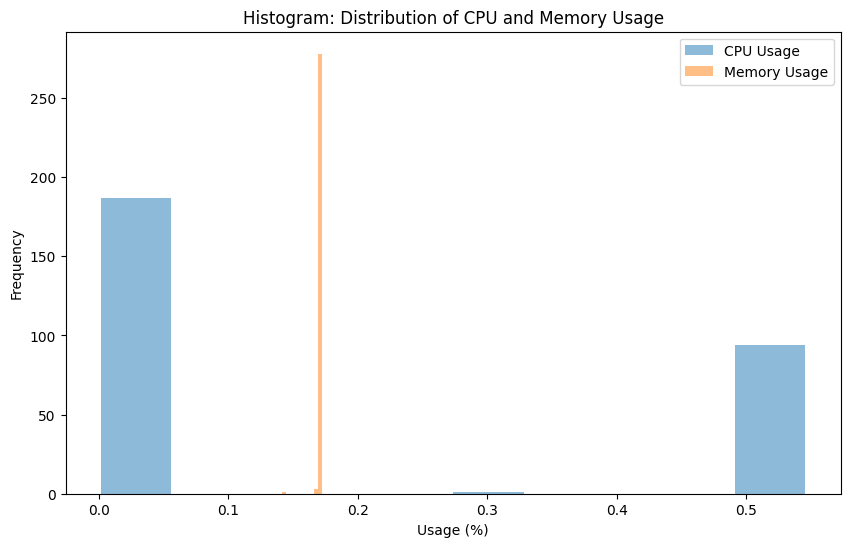

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['cpu_usage'], bins=10, alpha=0.5, label='CPU Usage')
plt.hist(df['memory_usage'], bins=10, alpha=0.5, label='Memory Usage')
plt.xlabel('Usage (%)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of CPU and Memory Usage')
plt.legend()
plt.show()

## 4. Boxplot: CPU and Memory Usage

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['cpu_usage', 'memory_usage']])
plt.title('Boxplot: CPU and Memory Usage')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

## 5. Stacked Bar Plot: Contribution of Each Stage to Processing Time

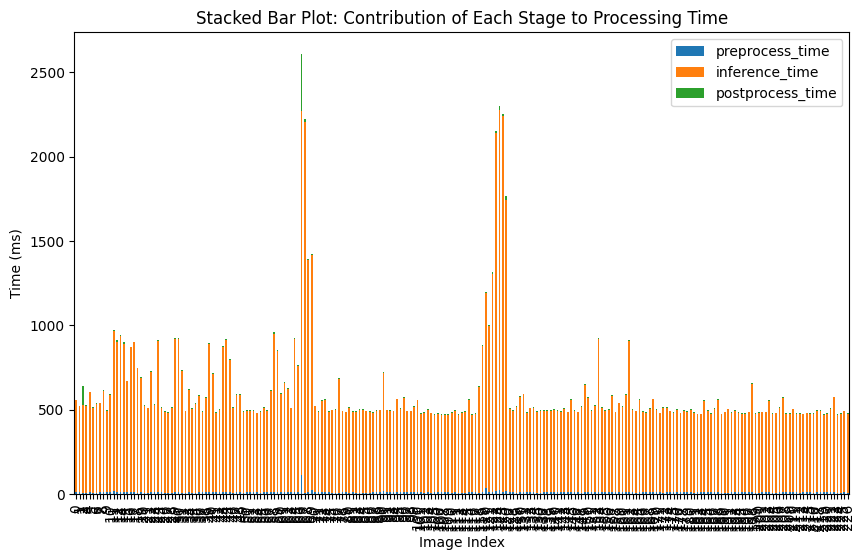

In [12]:
df['total_time'] = df['preprocess_time'] + df['inference_time'] + df['postprocess_time']
df[['preprocess_time', 'inference_time', 'postprocess_time']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Image Index')
plt.ylabel('Time (ms)')
plt.title('Stacked Bar Plot: Contribution of Each Stage to Processing Time')
plt.show()

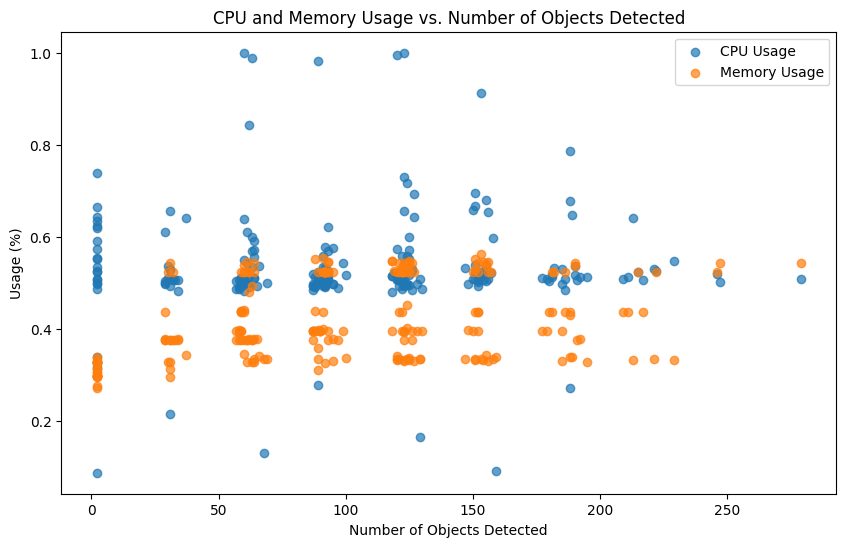

In [14]:
import matplotlib.pyplot as plt

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()

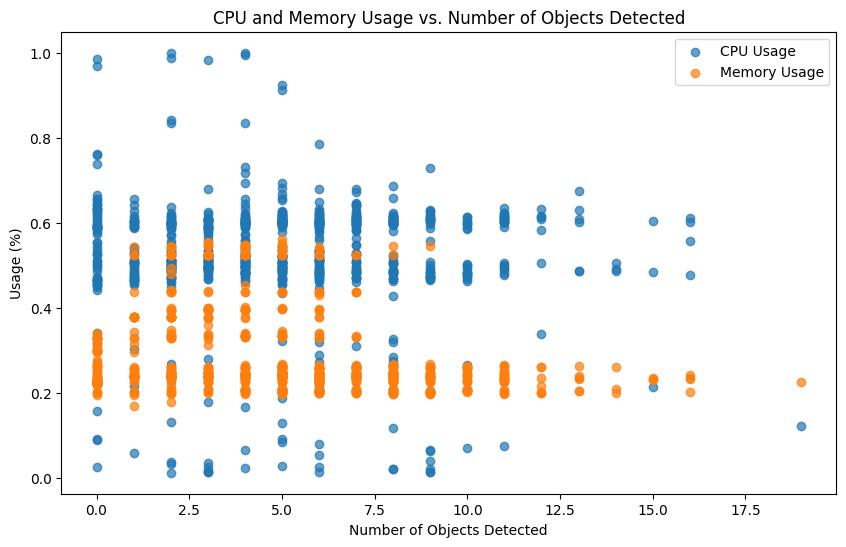

In [13]:
import ast

# Convert the 'objects_detected' column from string to a list (if needed)
df['objects_detected'] = df['objects_detected'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Calculate the number of objects detected for each row
df['num_objects_detected'] = df['objects_detected'].apply(len)

# Create a scatter plot for CPU and Memory Usage vs. Number of Objects Detected
plt.figure(figsize=(10, 6))
plt.scatter(df['num_objects_detected'], df['cpu_usage'], label='CPU Usage', alpha=0.7)
plt.scatter(df['num_objects_detected'], df['memory_usage'], label='Memory Usage', alpha=0.7)
plt.xlabel('Number of Objects Detected')
plt.ylabel('Usage (%)')
plt.title('CPU and Memory Usage vs. Number of Objects Detected')
plt.legend()
plt.show()